# Feature selection using Pearson Correlation

In [1]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [11]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [13]:
outliers = pd.DataFrame(columns=['Feature','Outliers','Percentage']) 
    
for column in list(df.columns):  
    # first quartile
    q1 = df[column].quantile(0.25)
    # third quartile
    q3 = df[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
    outliers = outliers.append({'Feature':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Outliers,Percentage
0,baseline value,0,0.000000
1,accelerations,14,0.658514
2,fetal_movement,307,14.440263
3,uterine_contractions,1,0.047037
4,light_decelerations,150,7.055503
5,severe_decelerations,7,0.329257
6,prolongued_decelerations,178,8.372531
7,abnormal_short_term_variability,0,0.000000
8,mean_value_of_short_term_variability,70,3.292568
9,percentage_of_time_with_abnormal_long_term_var...,309,14.534337


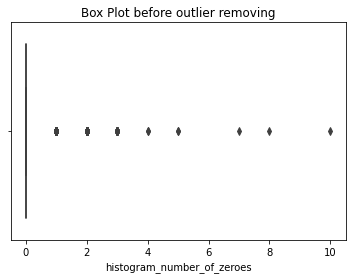

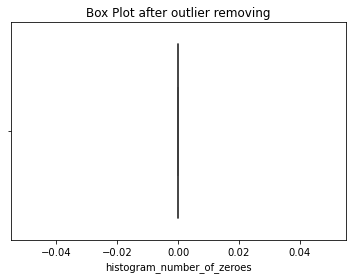

In [14]:
sns.boxplot(df['histogram_number_of_zeroes'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'histogram_number_of_zeroes')
sns.boxplot(df['histogram_number_of_zeroes'])
plt.title("Box Plot after outlier removing")
plt.show()

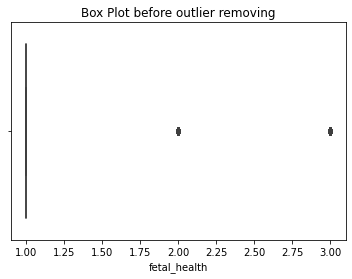

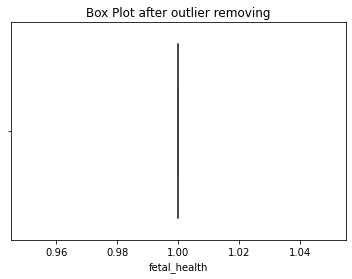

In [15]:
sns.boxplot(df['fetal_health'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fetal_health')
sns.boxplot(df['fetal_health'])
plt.title("Box Plot after outlier removing")
plt.show()

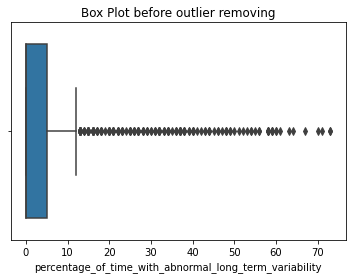

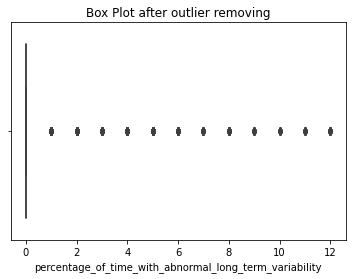

In [16]:
sns.boxplot(df['percentage_of_time_with_abnormal_long_term_variability'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'percentage_of_time_with_abnormal_long_term_variability')
sns.boxplot(df['percentage_of_time_with_abnormal_long_term_variability'])
plt.title("Box Plot after outlier removing")
plt.show()

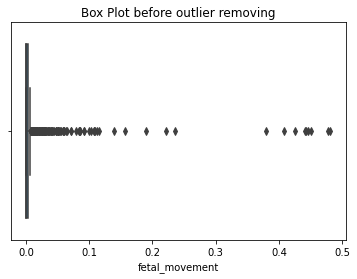

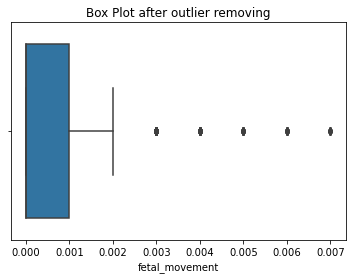

In [17]:
sns.boxplot(df['fetal_movement'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fetal_movement')
sns.boxplot(df['fetal_movement'])
plt.title("Box Plot after outlier removing")
plt.show()

In [18]:
#Input and output dataset
y=df['fetal_health']
X=df.drop(['fetal_health'],axis=1)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Data Preprocessing on Training data

In [20]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_rescaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1053,-0.514717,1.462857,-0.503242,0.701996,-0.268164,0.0,-0.139079,-0.828219,0.093095,-0.494425,...,1.641993,-1.337487,1.115652,2.234416,0.0,-0.295682,0.198010,-0.103300,0.166412,-0.532416
1060,-0.514717,-1.118427,-0.503242,0.701996,3.712875,0.0,-0.139079,-1.671681,2.251221,-0.494425,...,0.437470,-0.809128,-0.360619,0.575777,0.0,-1.814110,-1.766707,-1.780154,0.058976,-0.532416
1738,0.227344,0.430344,0.132029,0.701996,0.817574,0.0,-0.139079,1.247996,-0.369361,-0.494425,...,0.500866,-0.240125,0.584194,0.575777,0.0,0.767218,0.512365,0.695201,0.112694,1.209083
1095,-0.938751,1.979114,-0.503242,-1.128818,-0.630077,0.0,-0.139079,-1.347273,1.326310,-0.494425,...,-0.481771,0.166306,-0.655874,-0.668202,0.0,-0.523446,-0.273522,-0.422701,-0.585639,-0.532416
1350,-0.090682,-0.860298,-0.503242,-0.030330,0.455661,0.0,-0.139079,-1.022864,0.093095,-0.494425,...,0.532564,-1.012343,-0.478721,-0.668202,0.0,-0.143839,-0.273522,-0.103300,0.005259,1.209083


### Preprocessing For Test data

In [21]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
69,1.287430,-1.118427,-0.503242,-0.030330,-0.630077,0.0,-0.139079,0.209888,-0.831817,-0.162475,...,-0.957240,1.466884,0.347991,0.161118,0.0,1.830117,1.769784,1.733254,-0.531921,1.209083
674,0.863396,1.462857,-0.503242,-1.494981,-0.630077,0.0,-0.139079,0.923587,-0.061057,-0.494425,...,2.244254,-1.865847,1.469957,0.161118,0.0,2.893017,2.241317,2.451905,0.864746,1.209083
1857,0.651378,2.495370,-0.503242,0.335833,-0.630077,0.0,-0.139079,0.534297,-0.677665,-0.494425,...,-0.576865,1.060453,0.466093,-0.668202,0.0,0.691296,1.062486,0.854902,-0.531921,-0.532416
1969,0.651378,0.688472,-0.503242,-0.396493,-0.630077,0.0,-0.139079,1.053351,-0.985968,-0.494425,...,-0.767053,1.182383,0.288940,-1.082861,0.0,0.767218,0.748131,0.695201,-0.478203,-0.532416
1308,0.651378,-0.344042,-0.503242,1.068159,1.541399,0.0,-0.139079,-0.957982,-0.061057,2.493121,...,0.722752,-0.443340,0.702296,0.990437,0.0,0.463532,-0.116344,-0.023450,0.864746,-0.532416


## Feature Selection

### Drop the unwanted features using Pearson correlation

<AxesSubplot:>

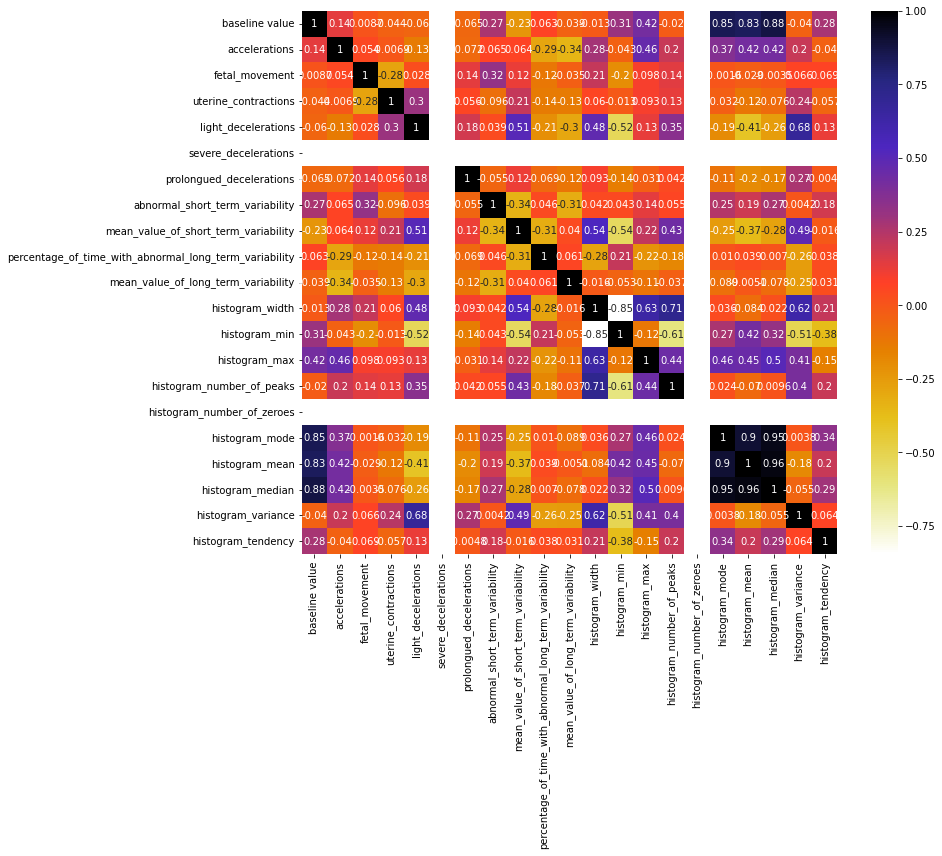

In [22]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train_rescaled.corr(),annot = True ,cmap=plt.cm.CMRmap_r)

In [23]:
# By using the function we can select highly correlated features

def pears_corr(data,threshold):
    corr_col=set() # set of names of correlated columns
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col         

In [29]:
corr_features=pears_corr(X_train_rescaled,0.5)
len(set(corr_features))

9

In [30]:
corr_features

{'histogram_max',
 'histogram_mean',
 'histogram_median',
 'histogram_min',
 'histogram_mode',
 'histogram_number_of_peaks',
 'histogram_variance',
 'histogram_width',
 'mean_value_of_short_term_variability'}

In [31]:
X_train_new=X_train_rescaled.drop(corr_features,axis=1)

In [32]:
X_test_new=X_test_rescaled.drop(corr_features,axis=1)

In [33]:
X_test_new.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,histogram_tendency
69,1.287430,-1.118427,-0.503242,-0.030330,-0.630077,0.0,-0.139079,0.209888,-0.162475,0.764556,0.0,1.209083
674,0.863396,1.462857,-0.503242,-1.494981,-0.630077,0.0,-0.139079,0.923587,-0.494425,0.219209,0.0,1.209083
1857,0.651378,2.495370,-0.503242,0.335833,-0.630077,0.0,-0.139079,0.534297,-0.494425,-1.416831,0.0,-0.532416
1969,0.651378,0.688472,-0.503242,-0.396493,-0.630077,0.0,-0.139079,1.053351,-0.494425,-0.027077,0.0,-0.532416
1308,0.651378,-0.344042,-0.503242,1.068159,1.541399,0.0,-0.139079,-0.957982,2.493121,-0.906668,0.0,-0.532416


In [34]:
X_test_new.shape

(222, 12)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_new, y_train)

KNeighborsRegressor()

In [38]:
y_test_pred = knn_reg.predict(X_test_new)

In [40]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0


In [41]:
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

1.0